## Individual cases analysis - which population group were the most endangered and are they now vaccinated?

In [7]:
#importing required packages 
import requests
import json
import pandas as pd
import numpy as np
from collections import defaultdict
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [2]:
import Module as m

In [3]:
df = m.get_individual()

In [4]:
df.columns= ['age', 'sex', 'ditrict', 'sub-district', 'imported', 'import_country'] 
df['sex'] = df["sex"].apply(lambda x: "F" if x=="Z" else "M") #transforming the data to english. Make sure to use only once!

## Sample overview

In [26]:
df["sex"].value_counts()

F    851004
M    806938
Name: sex, dtype: int64

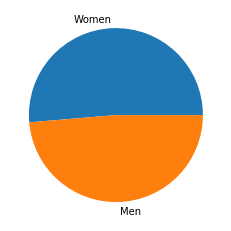

In [70]:
plt.pie(df["sex"].value_counts(), labels = ['Women', 'Men']);


We can see that more women were infected, which might have been expected as there are slightly more women in Czech Rebuplic, however the magnitute of the differnce is surprisingly significant.

In [9]:
df['age'].describe().round(2)

count    1657874.00
mean          42.87
std           20.73
min            0.00
25%           28.00
50%           44.00
75%           57.00
max          120.00
Name: age, dtype: float64

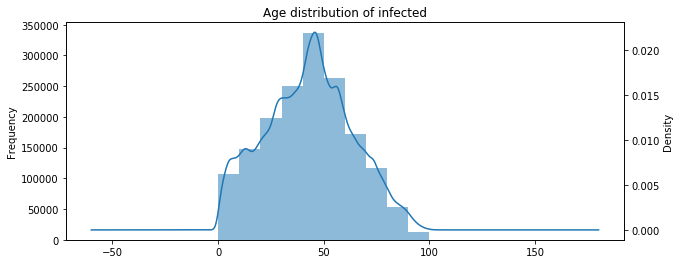

In [72]:
fig1, ax1 = plt.subplots(figsize=(10,4))
df['age'].plot(kind="hist", ax=ax1, alpha=0.5, bins=10, range=(0,100))
ax_1 = ax1.twinx()
df['age'].plot(kind="kde", ax=ax_1)
plt.title('Age distribution of infected') 
plt.show()

## From which country were most of the cases imported?

In [27]:
df['import_country'].value_counts().head(10)

UA    2915
DE    2615
AT    1027
SK    1006
HR     762
ES     554
EG     471
IT     465
PL     457
RU     406
Name: import_country, dtype: int64

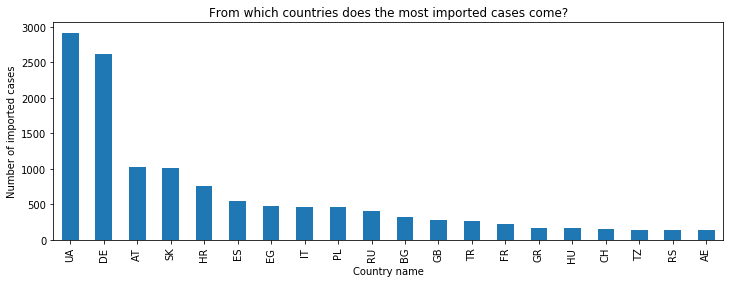

In [28]:
dfo = df['import_country'].value_counts()
dfo1 = dfo.sort_values(ascending = False)[0:20]
dfo2 = dfo1.plot.bar(figsize=(12,4))

plt.xlabel('Country name')
plt.ylabel('Number of imported cases')
plt.title('From which countries does the most imported cases come?')
plt.show()

Another a little surprising feature. One would assume that most of the cases would be imported from the neighbour countries. Actually, most of the cases were imported from Ukraine. Followed by Germany.

## Does gender matter?

In [9]:
df_deaths = m.get_individual_deaths()

In [11]:
df_deaths.columns= ['age', 'sex', 'ditrict', 'sub-district'] 
df_deaths['sex'] = df_deaths["sex"].apply(lambda x: "F" if x=="Z" else "M") #transforming the data to english. Make sure to use only once!

In [12]:
df_deaths['sex'].value_counts()

M    17481
F    12923
Name: sex, dtype: int64

We can observe that eventhough significantly more women got infected, the number of deaths is significantly higher for men. Let's find out wheather there might have been other factors causing the difference in deathrates - for example whether the men were significantly older then women. 

In [33]:
df_w = df.query("sex == 'F'")
df_m = df.query("sex == 'M'")

In [34]:
df_d_w = df_deaths.query("sex == 'F'")
df_d_m = df_deaths.query("sex == 'M'")

In [35]:
df_w['age'].describe() #describtive statistics of infected women

count    850977.000000
mean         43.757114
std          21.044592
min           0.000000
25%          29.000000
50%          44.000000
75%          58.000000
max         120.000000
Name: age, dtype: float64

In [36]:
df_m['age'].describe() #describtive statistics of infected men

count    806897.000000
mean         41.930442
std          20.347154
min           0.000000
25%          27.000000
50%          43.000000
75%          56.000000
max         120.000000
Name: age, dtype: float64

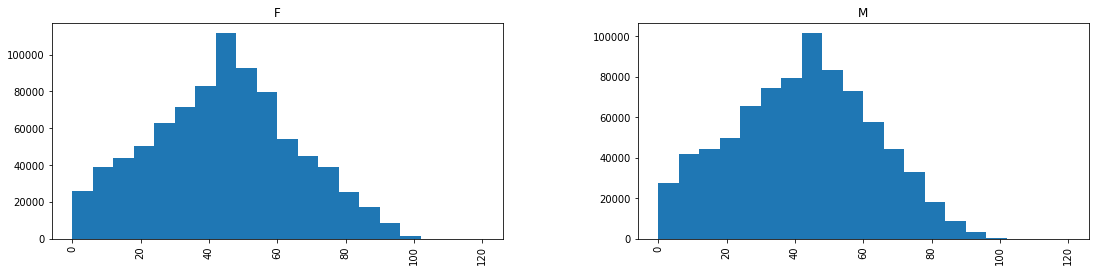

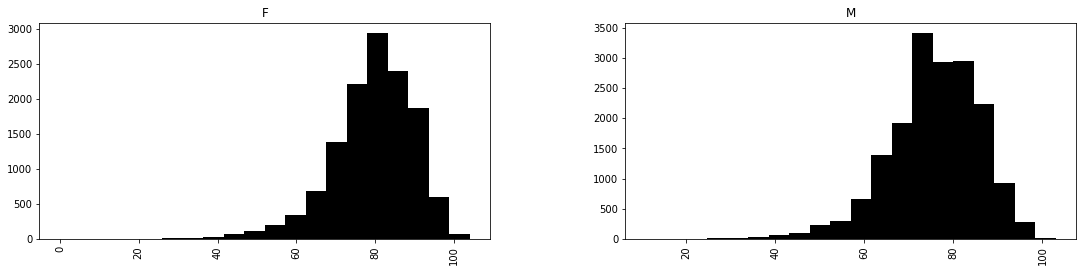

In [67]:
df.hist("age", bins=20, by = ["sex"], layout=[1,2],figsize = [18,4]);
df_deaths.hist("age", bins=20, by = ["sex"],figsize = [18,4], color='black'); 

In [38]:
df_d_w['age'].describe() #decribtive statistics of women's deaths

count    12913.000000
mean        79.297452
std         10.528111
min          0.000000
25%         73.000000
50%         80.000000
75%         87.000000
max        104.000000
Name: age, dtype: float64

In [39]:
df_d_m['age'].describe() #decribtive statistics of men's deaths

count    17474.000000
mean        75.641296
std         10.271214
min         11.000000
25%         70.000000
50%         76.000000
75%         83.000000
max        103.000000
Name: age, dtype: float64

We can observe that both by mean and 75% percentile women were approx. 2 year older then men (also median is higher). Moreover women on average died at approx. 3.5 years older age. Therefore this does not explain the higher deathrate of men. It might have been given by other underlining conditions (other heath problems), however our sample is pretty big, and this is deffinitelly an interesting pattern. 

## How are deaths by gender associated with vaccination?

In [3]:
df_vacc = m.get_gender_vacc()

In [4]:
men1 = df_vacc[(df_vacc['pohlavi']=='M') & (df_vacc['poradi_davky']==1)] #number of men with 1.dose of vaccine
sum(men1['pocet_davek'])

2858558

In [5]:
men2 = df_vacc[(df_vacc['pohlavi']=='M') & (df_vacc['poradi_davky']==2)] #number of men with 2.dose of vaccine
sum(men2['pocet_davek'])

2641990

In [6]:
women1 = df_vacc[(df_vacc['pohlavi']=='Z') & (df_vacc['poradi_davky']==1)] #number of women with 1.dose of vaccine
sum(women1['pocet_davek'])

3080054

In [7]:
women2 = df_vacc[(df_vacc['pohlavi']=='Z') & (df_vacc['poradi_davky']==2)] #number of women with 2.dose of vaccine
sum(women2['pocet_davek'])

2882679

In [13]:
shares = [sum(men1['pocet_davek'])/sum(women1['pocet_davek']),sum(men2['pocet_davek'])/sum(women2['pocet_davek']),df_deaths['sex'].value_counts()[0]/df_deaths['sex'].value_counts()[1]]
shares

[0.9280869750984886, 0.9165050982089924, 1.3527044803838117]

The shares indicate quite similar proportion between the number of men and the number of women that are after the 1. dose and the 2.dose of vaccine, respectively. However, both these values differ significantly to the share of deaths which may indicate that the difference in deaths by gender cannot be explained by the level of vaccination by gender. 